# 4.2 Linear Transformations

In [41]:
%load_ext autoreload
%autoreload 2
from jupyterthemes import jtplot
jtplot.style()

from ch04.functions import *
from ch03.draw2d import * #for 2d drawing stuff

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Applying linear transform to a vector:

In [11]:
e1 = (1, 0, 0)
e2 = (0, 1, 0)
e3 = (0, 0, 1)

Ae1 = (1,1,1) # A(e1)
Ae2 = (1,0,-1) #A(e2)
Ae3 = (0,1,1) #A(e3)

def apply_a(v):
    #s1, s2, s3 are the scalar values of x, y, z in the vector
    # v can be rewritten as (s1 * e1) + (s2 * e2) + (s3 *e3)
    # By adding these 3 vectors together, we end up with v

    # To apply A to a given vector, we multiply s1, s2, s3 with ae1, ae2, and ae3
    s1,s2,s3 = v
    vectorsToAdd = [
        scale(s1, Ae1),
        scale(s2, Ae2),
        scale(s3, Ae3),
    ]

    return add(*vectorsToAdd)

print(apply_a( (-1, 2, 2) )) #expected = (1, 1, -1)

(1, 1, -1)


Drawing apply_a to teapot:

In [8]:
!python 14_teapot_with_linear_transform.py

pygame 2.0.0.dev10 (SDL 2.0.12, python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
ALSA lib pcm_dmix.c:1089:(snd_pcm_dmix_open) unable to open slave


Exercise 4.13: What is the midpoint between (5, 3) and (-2, 1)? Plot all three of these points to see that you are correct.

(1.5, 2.0)


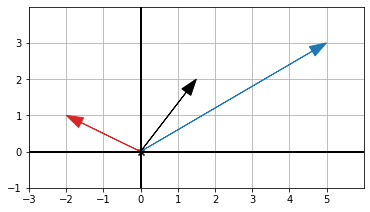

In [14]:
u = (5, 3)
v = (-2, 1)
midpoint = add( scale(0.5, u), scale(0.5, v) ) # midpoint = 0.5u + 0.5v
print(midpoint)

draw2d(
    Arrow2D(u, color=blue),
    Arrow2D(v, color=red),
    Arrow2D(midpoint, color=black)
)

Exercise 4.14: Consider again the non-linear transformation S(v) sending v = (x, y) to (x2, y2). Plot all 36 vectors v with
integer coordinates 0 to 5 as points using the drawing code from chapter 2 and then plot S(v) for each of them. What
happens geometrically to vectors under the action of S?

36


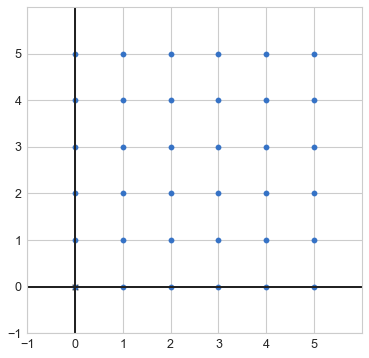

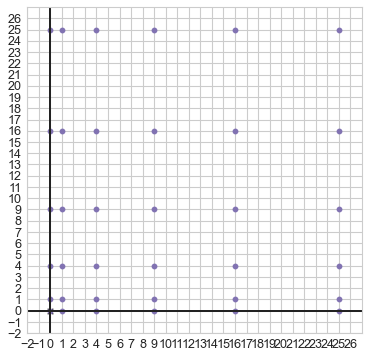

In [26]:
def apply_s(v):
    x,y = v
    return (x ** 2, y ** 2)

options = range(0, 6)
vectors = [(x, y) for x in options for y in options]

print(len(list(vectors))) # 36 as expected

draw2d(Points2D(*vectors, color=blue))

transformed = [apply_s(p) for p in vectors]

draw2d(Points2D(*transformed, color=red))

Mini-project 4.15: Property-based testing is a type of unit testing that involves inventing arbitrary input data for a
program and then checking that the outputs satisfy desired conditions. There are popular Python libraries like
Hypothesis (available through pip) that make it easy to set this up. Using your library of choice, implement property-
based tests that check if a vector transformation is linear.

**Specifically, given a vector transformation T implemented as a Python function, generate a large number of pairs of
random vectors and assert for all of those that their sum is preserved by T. Then, do the same thing for pairs of a scalar
and a vector, and ensure that T preserves scalar multiples. You should find that linear transformations like
rotate_x_by(pi/2) pass the test, but non-linear transformations like the coordinate-squaring transformation do
not pass.**


In [43]:
# Generating random random vectors

from random import uniform, randint

#Pairs of two randomly generated vectors, e.g ( (a,b, c), (x,y, z) )
rand_vec_pairs = [(
                    (randint(0, 1000), randint(0, 1000), randint(0, 1000)), #u
                    (randint(0, 1000), randint(0, 1000), randint(0, 1000)) # v
                 ) for i in range(100)]


# Pairs of a randomly generated scalar and a vector, e.g ( s, (a, b, c) )
rand_scalar_pairs = [(
    (randint(0, 1000), ( (randint(0, 1000), randint(0, 1000), randint(0, 1000) )  ) )
) for i in range(100)]

print("Generated %d rand vecs, %d rand vec scalars, sample of 5:"
            % (len(rand_vec_pairs), len(rand_scalar_pairs)))

for i in range(0, 5):
    print(rand_vec_pairs[i])


for i in range(0, 5):
    print(rand_scalar_pairs[i])

Generated 100 rand vecs, 100 rand vec scalars, sample of 5:
((340, 468, 12), (550, 222, 647))
((176, 540, 251), (240, 442, 600))
((350, 226, 506), (563, 991, 232))
((401, 414, 420), (443, 8, 889))
((23, 120, 667), (349, 206, 215))
(227, (881, 603, 117))
(69, (845, 49, 281))
(747, (394, 763, 527))
(832, (892, 697, 25))
(170, (79, 174, 182))


In [109]:
from numpy import  isclose

# Function to verify if given transform is linear. Returns True/False
# t = function which returns transformed vec

def is_transform_linear(T):
    for t in rand_vec_pairs:
        u, v = t
        if not verify_linear_sum(T, u, v):
            print("Failed addition verification for %s, %s" %( (str(u), str(v))))
            return False

    print("Passed linear additions")
    for t in rand_scalar_pairs:
        s, v = t
        if not verify_linear_multiples(T, s, v):
            print("Failed multiplication verification for %d, %s" %( (s, str(v))))
            return False

    print("Passed linear multiplications")
    return True

def verify_linear_sum(T, u, v):
    # T(u) + T(v) = T(u + v)
    Tu = T(u)
    Tv = T(v)

    #print("u: %s, v: %s, u + v: %s" %( str(u), str(v), str(add(u, v))))
    #print("T(u): %s, T(v): %s" % (str(Tu), str(Tv)))
    #print("T(u) + T(v): %s" % str(add(Tu, Tv)))
    #print("T(u + v): %s" % str( T( add(u, v) ) ))
    #print("Equal? %s" % str( isclose( add(Tu, Tv) ,T( add(u, v) ) ).all() ))
    return isclose(add(Tu, Tv) ,T( add(u, v) )).all() == True

def verify_linear_multiples(T, s, v):
    # T(sv) = s(T(v))
    sv = scale(s, v)
    Tv = T(v)
    #return T(sv) == scale(s, Tv)
    return isclose( T(sv), scale(s, Tv) ).all() == True

In [112]:
# Verifying linear transforms:

rotate_x_ninety_deg = rotate_x_by(pi / 2)

def square_3d(v):
    x, y, z = v
    return (x ** 2, y ** 2, z ** 2)

assert is_transform_linear(rotate_x_ninety_deg) == True
print("Expecting fail:")
assert is_transform_linear(square_3d) == False

Passed linear additions
Passed linear multiplications
Expecting fail:
Failed addition verification for (340, 468, 12), (550, 222, 647)


Exercise 4.16: Draw two vectors and their sum, as well as the reflection of these three vectors to demonstrate that this transformation
preserves vector addition. Draw another diagram to show similarly that scalar multiplication is preserved, thereby
demonstrating both criteria for linearity.

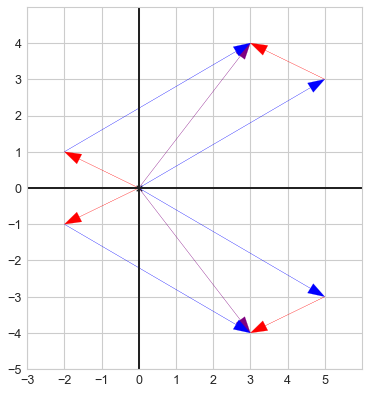

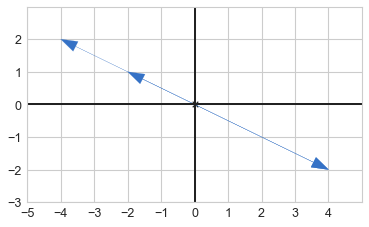

In [125]:
u = (5, 3)
v = (-2, 1)
w = add(u, v)
assert w == (3, 4)

# Reflecting across x, i.e keep X same and flip sign on y:
uR = (5, -3)
vR = (-2, -1)
wR = (3, -4)

draw2d(
    Arrow2D(u, color='blue'),
    Arrow2D(v, color='red'),
    Arrow2D(w, color='purple'),
    Arrow2D(w, u, color='red'),
    Arrow2D(w, v, color='blue'),

    Arrow2D(uR, color='blue'),
    Arrow2D(vR, color='red'),
    Arrow2D(wR, color='purple'),
    Arrow2D(wR, uR, color='red'),
    Arrow2D(wR, vR, color='blue'),
)

#Scale the vectors by 2 and draw again:
sv = scale(2, v)
tsv = scale(-1, sv)
stv = scale(2, scale(-1, v))

draw2d(
    Arrow2D(v, color=blue),
    Arrow2D(sv, color=blue),
    Arrow2D(scale(-1, sv), color=blue),
    Arrow2D(scale(2, scale(-1, v)), color=blue)
)


Exercise 4.19: Write a linear_combination(scalars, *vectors) that takes a list of scalars and the same
number of vectors, and returns a single vector. For example, linear_combination([1,2,3], (1,0,0),
(0,1,0), (0,0,1)) should return 1 · (1, 0, 0) + 2 · (0, 1, 0) + 3 · (0, 0, 1) or (1, 2, 3).

In [132]:
def linear_combinators(scalars, *vectors):
    #scaled_vecs = [scale(scalars[i], vectors[i]) for i in range(len(scalars))]
    scaled_vecs = [scale(s, v) for s, v in zip(scalars, vectors)]
    return add(scaled_vecs)

print(linear_combination([1,2,3], (1,0,0),(0,1,0), (0,0,1)))

(1, 2, 3)


Exercise 4.20: Write a function transform_standard_basis(transform) that takes a 3D vector transformation
as an input and outputs the effect it has on the standard basis. It should output a tuple of 3 vectors that are the results
of transform acting on e 1 , e 2 , and e 3 , respectively.



In [133]:
def transform_standard_basis(T):
    return T(e1), T(e2), T(e3)

print(transform_standard_basis(rotate_x_ninety_deg))

((1, 0.0, 0.0), (0, 6.123233995736766e-17, 1.0), (0, -1.0, 1.2246467991473532e-16))
